<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Vocabulary-Size" data-toc-modified-id="Vocabulary-Size-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Vocabulary Size</a></span><ul class="toc-item"><li><span><a href="#top-k-words" data-toc-modified-id="top-k-words-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>top k words</a></span></li><li><span><a href="#plot-of-terms-frequency" data-toc-modified-id="plot-of-terms-frequency-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>plot of terms frequency</a></span></li></ul></li><li><span><a href="#Labels" data-toc-modified-id="Labels-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Labels</a></span><ul class="toc-item"><li><span><a href="#Number-of-topics-per-doc" data-toc-modified-id="Number-of-topics-per-doc-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Number of topics per doc</a></span></li><li><span><a href="#topics-in-train-but-not-in-test" data-toc-modified-id="topics-in-train-but-not-in-test-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>topics in train but not in test</a></span></li><li><span><a href="#topics-in-test-but-not-in-train" data-toc-modified-id="topics-in-test-but-not-in-train-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>topics in test but not in train</a></span></li><li><span><a href="#Train-topics-freq" data-toc-modified-id="Train-topics-freq-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Train topics freq</a></span></li><li><span><a href="#List-of-learned-and-predicted-topics" data-toc-modified-id="List-of-learned-and-predicted-topics-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>List of learned and predicted topics</a></span></li></ul></li><li><span><a href="#Document-Lengths" data-toc-modified-id="Document-Lengths-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Document Lengths</a></span></li></ul></div>

In [108]:
import os
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from collections import Counter

In [109]:
vocabulary_path = '../../statistics_out/vocab.pckl'
train_path = '../../data/reuters_prep_train.txt'
test_path = '../../data/reuters_prep_test.txt'

## Vocabulary Size

In [110]:
with open(vocabulary_path, mode='rb') as stream:
    vocab_dict = pickle.load(stream)

In [21]:
len(vocab_dict)

28391

In [22]:
vocab_sorted = dict(sorted([(k, v) for k, v in vocab_dict.items()], key=lambda pair: pair[1], reverse=True))

### top k words

In [23]:
k = 50
for i, (word, count) in enumerate(vocab_sorted.items()):
    print(f'{word: <10s} - {count: 5d}')
    if i > k:
        break

said       -  30067
mln        -  16079
dlrs       -  12702
pct        -  10494
v          -  9387
year       -  8306
share      -  6042
billion    -  5974
company    -  5942
ct         -  5919
bank       -  5146
u          -  4956
would      -  4760
inc        -  4143
loss       -  4091
net        -  3887
new        -  3584
corp       -  3572
stock      -  3374
market     -  3334
price      -  3198
sale       -  3130
one        -  3084
last       -  3044
also       -  2895
two        -  2886
profit     -  2619
shr        -  2571
co         -  2554
rate       -  2497
april      -  2476
march      -  2401
month      -  2390
debt       -  2146
trade      -  2139
exchange   -  2092
oil        -  2070
may        -  2050
first      -  2011
per        -  1960
government -  1931
tonne      -  1919
three      -  1891
group      -  1890
agreement  -  1874
official   -  1859
security   -  1838
february   -  1808
dlr        -  1778
note       -  1733
interest   -  1700
january    -  1689


Check tokens with len=1 (u, v)

### plot of terms frequency

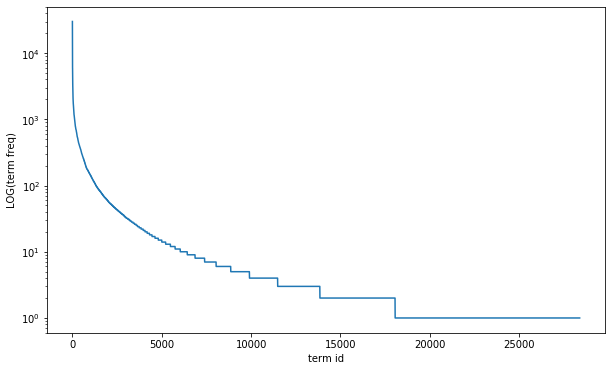

In [39]:
terms_freq = list(vocab_soretd.values())
# plt.plot(terms_freq[10:])
plt.semilogy(terms_freq)
plt.xlabel('term id')
plt.ylabel('LOG(term freq)')
fig = plt.gcf()
fig.set_size_inches(10, 6)

In [46]:
pd.DataFrame(terms_freq).describe(percentiles=[.01, .10, .25, .50, .75, .99])

,0
count,28391.000000
mean,30.718819
std,285.976514
min,1.000000
1%,1.000000
10%,1.000000
25%,1.000000
50%,2.000000
75%,8.000000
99%,531.000000


Half of the terms occur 2 or 1 times.

## Labels

In [59]:
def read_data(data_path: str, sep: str = ','):
    assert os.path.exists(data_path)
    docs, topics, ids = [], [], []
    with open(data_path) as stream:
        lines = stream.readlines()
        for line in lines:
            doc, doc_topics, doc_newid = line.strip().split(sep)
            docs.append(doc)
            topics.append(doc_topics)
            ids.append(doc_newid)
    return docs, topics, ids

In [61]:
_, train_topics, _ = read_data(train_path)
_, test_topics, _ = read_data(test_path)

In [ ]:
train_topics = [t.split(' ') for t in train_topics]
test_topics = [t.split(' ') for t in test_topics]

In [84]:
# train size
len(train_topics)

12282

In [85]:
# test size
len(test_topics)

5876

### Number of topics per doc

In [82]:
Counter([len(t) for t in train_topics]).most_common(20)

[(1, 11269),
 (2, 738),
 (3, 159),
 (4, 54),
 (5, 30),
 (6, 13),
 (7, 6),
 (8, 4),
 (9, 4),
 (10, 3),
 (12, 1),
 (16, 1)]

In [83]:
Counter([len(t) for t in test_topics]).most_common(20)

[(1, 5343),
 (2, 368),
 (3, 99),
 (4, 34),
 (5, 13),
 (6, 7),
 (7, 3),
 (9, 2),
 (14, 2),
 (11, 2),
 (12, 1),
 (10, 1),
 (8, 1)]

99% of the data has 3 and less topics.

92% has 1 topic.

In [95]:
unique_topics_train = set([t for topics in train_topics for t in topics])
unique_topics_test = set([t for topics in test_topics for t in topics])

In [96]:
len(unique_topics_train)

115

In [97]:
len(unique_topics_test)

96

### topics in train but not in test

In [99]:
unique_topics_train - unique_topics_test

{'austdlr',
 'can',
 'castorseed',
 'citruspulp',
 'coconut',
 'copra-cake',
 'corn-oil',
 'cornglutenfeed',
 'cpu',
 'dfl',
 'dkr',
 'fishmeal',
 'lin-meal',
 'linseed',
 'peseta',
 'plywood',
 'pork-belly',
 'rape-meal',
 'red-bean',
 'ringgit',
 'rupiah',
 'saudriyal',
 'skr',
 'wool'}

### topics in test but not in train

In [101]:
unique_topics_test - unique_topics_train

{'bfr', 'cottonseed', 'f-cattle', 'hk', 'sfr'}

### Train topics freq

In [103]:
Counter([t for topics in train_topics for t in topics]).most_common(200)

[('NO_TOPIC', 5540),
 ('earn', 2687),
 ('acq', 1447),
 ('money-fx', 397),
 ('grain', 371),
 ('crude', 309),
 ('trade', 281),
 ('interest', 254),
 ('wheat', 192),
 ('ship', 178),
 ('corn', 148),
 ('oilseed', 108),
 ('sugar', 108),
 ('coffee', 97),
 ('gold', 92),
 ('veg-oil', 83),
 ('money-supply', 80),
 ('dlr', 80),
 ('gnp', 79),
 ('livestock', 70),
 ('soybean', 65),
 ('nat-gas', 63),
 ('bop', 55),
 ('cpi', 54),
 ('carcass', 48),
 ('copper', 46),
 ('reserves', 44),
 ('cocoa', 39),
 ('cotton', 37),
 ('jobs', 36),
 ('iron-steel', 35),
 ('rice', 34),
 ('barley', 33),
 ('alum', 32),
 ('rubber', 31),
 ('ipi', 31),
 ('meal-feed', 29),
 ('gas', 29),
 ('palm-oil', 28),
 ('yen', 26),
 ('silver', 21),
 ('zinc', 21),
 ('pet-chem', 20),
 ('sorghum', 18),
 ('rapeseed', 18),
 ('strategic-metal', 16),
 ('tin', 16),
 ('wpi', 16),
 ('orange', 15),
 ('lead', 15),
 ('retail', 14),
 ('hog', 14),
 ('heat', 14),
 ('soy-oil', 13),
 ('housing', 13),
 ('soy-meal', 12),
 ('fuel', 12),
 ('dmk', 10),
 ('lei', 9),


Tail of rare topics

### List of learned and predicted topics

In [106]:
train_topics_sorted = Counter([t for topics in train_topics for t in topics]).most_common(200)
print([topic for topic, count in train_topics_sorted])

['NO_TOPIC', 'earn', 'acq', 'money-fx', 'grain', 'crude', 'trade', 'interest', 'wheat', 'ship', 'corn', 'oilseed', 'sugar', 'coffee', 'gold', 'veg-oil', 'money-supply', 'dlr', 'gnp', 'livestock', 'soybean', 'nat-gas', 'bop', 'cpi', 'carcass', 'copper', 'reserves', 'cocoa', 'cotton', 'jobs', 'iron-steel', 'rice', 'barley', 'alum', 'rubber', 'ipi', 'meal-feed', 'gas', 'palm-oil', 'yen', 'silver', 'zinc', 'pet-chem', 'sorghum', 'rapeseed', 'strategic-metal', 'tin', 'wpi', 'orange', 'lead', 'retail', 'hog', 'heat', 'soy-oil', 'housing', 'soy-meal', 'fuel', 'dmk', 'lei', 'lumber', 'nickel', 'stg', 'oat', 'tea', 'sunseed', 'sun-oil', 'platinum', 'rape-oil', 'l-cattle', 'groundnut', 'plywood', 'jet', 'income', 'coconut', 'tapioca', 'propane', 'potato', 'instal-debt', 'coconut-oil', 'inventories', 'linseed', 'copra-cake', 'palmkernel', 'cornglutenfeed', 'wool', 'saudriyal', 'fishmeal', 'palladium', 'cpu', 'austdlr', 'naphtha', 'pork-belly', 'lin-oil', 'rye', 'red-bean', 'groundnut-oil', 'citru

In [107]:
print([count for topic, count in train_topics_sorted])

[5540, 2687, 1447, 397, 371, 309, 281, 254, 192, 178, 148, 108, 108, 97, 92, 83, 80, 80, 79, 70, 65, 63, 55, 54, 48, 46, 44, 39, 37, 36, 35, 34, 33, 32, 31, 31, 29, 29, 28, 26, 21, 21, 20, 18, 18, 16, 16, 16, 15, 15, 14, 14, 14, 13, 13, 12, 12, 10, 9, 9, 8, 8, 7, 7, 6, 5, 5, 5, 5, 5, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


## Document Lengths

In [111]:
train_docs, _, _ = read_data(train_path)

In [112]:
doc_lens = [len(doc.split(' ')) for doc in train_docs]

Text(0, 0.5, 'frequency')

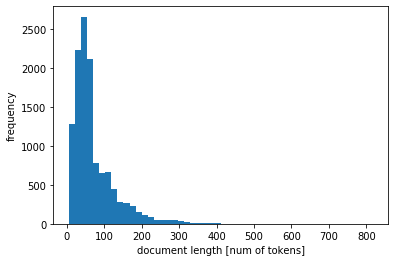

In [115]:
plt.hist(doc_lens, bins=50)
plt.xlabel('document length [num of tokens]')
plt.ylabel('frequency')